In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
from GetObjects import *

In [2]:
likeDir = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/Kyle_Stuff/MaximumLikelihood/'

In [3]:
minGR = -0.3
maxGR = 1

detBalrStarFile = '/afs/hep.wisc.edu/bechtol-group/MegansThings/balrog_detection_catalog_sof_run2_stars_v1.4_avg_added_match_flags.fits'
detStarFile = likeDir + 'ColorData/Det_Stars.fits'

In [4]:
# getDetStar(minGR, maxGR, detBalrStarFile, detStarFile, includeRMAG = True)

In [5]:
detStarData = fitsio.read(detStarFile)

In [6]:
GMAG = detStarData['GMAG']
RMAG = detStarData['RMAG']
DETECTED = detStarData['DETECTED']

DETECTED = DETECTED[np.where((GMAG >= 24) & (GMAG <= 24.1))[0]]
RMAG = RMAG[np.where((GMAG >= 24) & (GMAG <= 24.1))[0]]
GMAG = GMAG[np.where((GMAG >= 24) & (GMAG <= 24.1))[0]]
#RMAG = RMAG[np.where((RMAG >= 24) & (RMAG <= 24.01))[0]]
GR_COLOR = GMAG - RMAG

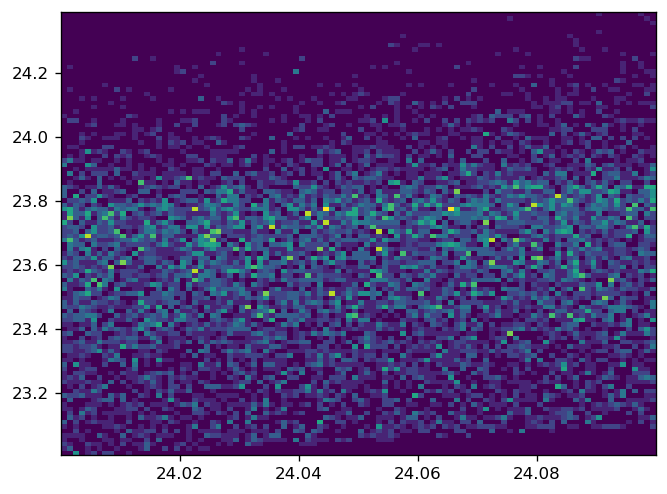

In [7]:
plt.figure(dpi = 120)
plt.hist2d(GMAG, RMAG, bins = 100)
plt.show()

In [8]:
len(RMAG)

11563

In [9]:
x = np.linspace(np.min(GR_COLOR), np.max(GR_COLOR), 10)

sigma = 0.5
y = []
        
for xi in x:
    # Gaussian weighting the values close by to each x value.
    totDet = np.sum(DETECTED * np.exp(-1*(((GR_COLOR - xi) / sigma)**2)))
    totAll = np.sum(np.exp(-1*(((GR_COLOR - xi) / sigma)**2)))
    y.append((totDet / totAll))

y = np.array(y)

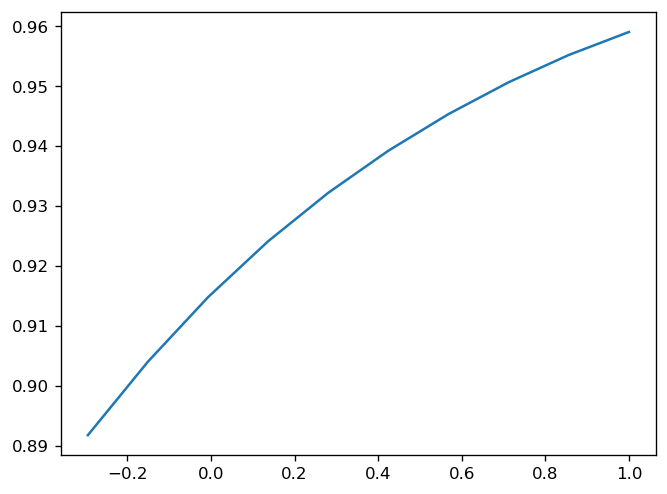

In [10]:
plt.figure(dpi = 120)
plt.plot(x, y)
plt.show()

In [11]:
matStarFile = likeDir + 'InjectionData/Mat_Stars.fits'
matStarData = fitsio.read(matStarFile)

In [12]:
matGMAG = matStarData['GMAG']
matRMAG = matStarData['RMAG']
matCLASS = matStarData['CLASS']

CLASS = np.zeros(len(matCLASS))
CLASS[np.where(matCLASS <= 1)] = 1

CLASS = CLASS[np.where((matGMAG >= 24) & (matGMAG <= 24.1))[0]]
matRMAG = matRMAG[np.where((matGMAG >= 24) & (matGMAG <= 24.1))[0]]
matGMAG = matGMAG[np.where((matGMAG >= 24) & (matGMAG <= 24.1))[0]]
matGR_COLOR = matGMAG - matRMAG

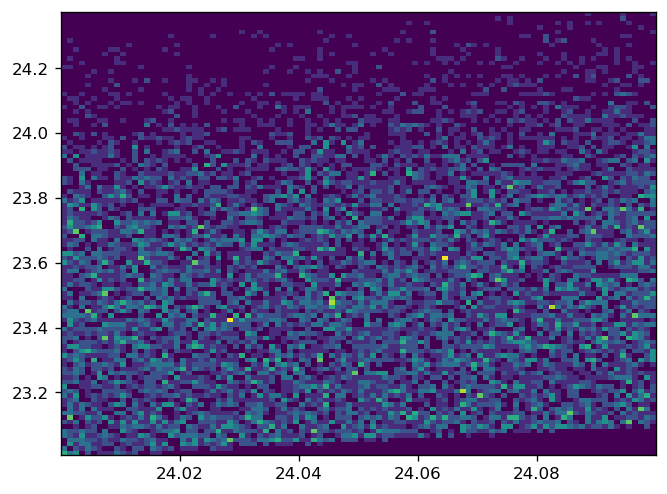

In [13]:
plt.figure(dpi = 120)
plt.hist2d(matGMAG, matRMAG, bins = 100)
plt.show()

In [14]:
np.min(matGMAG - matRMAG)

-0.2894897504838383

In [15]:
x = np.linspace(np.min(matGR_COLOR), np.max(matGR_COLOR), 10)

sigma = 0.5
y = []
        
for xi in x:
    # Gaussian weighting the values close by to each x value.
    totDet = np.sum(CLASS * np.exp(-1*(((matGR_COLOR - xi) / sigma)**2)))
    totAll = np.sum(np.exp(-1*(((matGR_COLOR - xi) / sigma)**2)))
    y.append((totDet / totAll))

y = np.array(y)

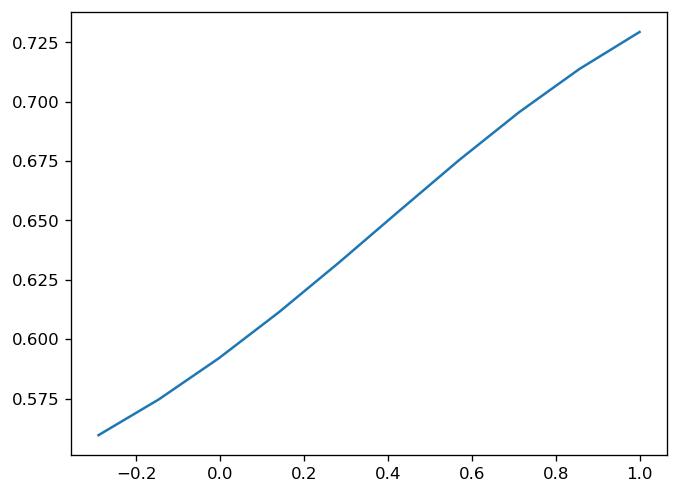

In [16]:
plt.figure(dpi = 120)
plt.plot(x, y)
plt.show()